SCRIPT para la carga de los dataframes en Power BI:

In [1]:
## SCRIPT PARA CARGAR LOS DATAFRAMES

import mysql.connector
import pandas as pd

conexion_Eva = mysql.connector.connect(host='localhost', user='root', password='root', database='sprint_4') # cambiar nombre de la BBDD
cursor = conexion_Eva.cursor()

cursor.execute('''SELECT * FROM transactions''') 
transactions = cursor.fetchall()
columnas = [desc[0] for desc in cursor.description]

transactions_DF = pd.DataFrame(transactions, columns=columnas)
transactions_DF.rename(columns={'business_id': 'Empresa', 'amount':'Importe'}, inplace=True)
transactions_DF['Importe'] = transactions_DF['Importe'].astype(float)

cursor.execute('''SELECT * FROM products''')
products = cursor.fetchall()
columnas = [desc[0] for desc in cursor.description]

products_DF = pd.DataFrame(products, columns=columnas)
products_DF['price'] = products_DF['price'].astype(float)
products_DF['weight'] = products_DF['weight'].astype(float)

cursor.execute('''SELECT * FROM companies''')
companies = cursor.fetchall()
columnas = [desc[0] for desc in cursor.description]

companies_DF = pd.DataFrame(companies, columns=columnas)
companies_DF.rename(columns={'company_id': 'Empresa', 'country':'País'}, inplace=True)

country_count = pd.DataFrame(companies_DF['País'].value_counts().reset_index())

transactions_companies = pd.merge(companies_DF, transactions_DF, on='Empresa', how='inner')

total_pais = pd.DataFrame(transactions_companies.groupby('País')['Importe'].sum().sort_values(ascending=False).reset_index())

empresa_amount_pais = pd.DataFrame(transactions_companies, columns=['company_name','País','Importe'])

top10_empresas = pd.DataFrame(empresa_amount_pais.groupby(['company_name', 'País']).agg({'Importe': 'sum'}).sort_values(by='Importe', ascending=False).head(10).reset_index())

info_pais = pd.DataFrame(transactions_companies, columns=['País', 'Importe', 'Empresa', 'company_name','id'])

info_pais.rename(columns={'id': 'id_transaccion'}, inplace=True)

info_pais = pd.DataFrame(info_pais.groupby('País').agg(
    Total_Importe=('Importe', 'sum'),
    Nº_Transacciones=('id_transaccion', 'count'),
    Nº_Empresas=('Empresa', 'nunique')).reset_index())

conexion_Eva.close()



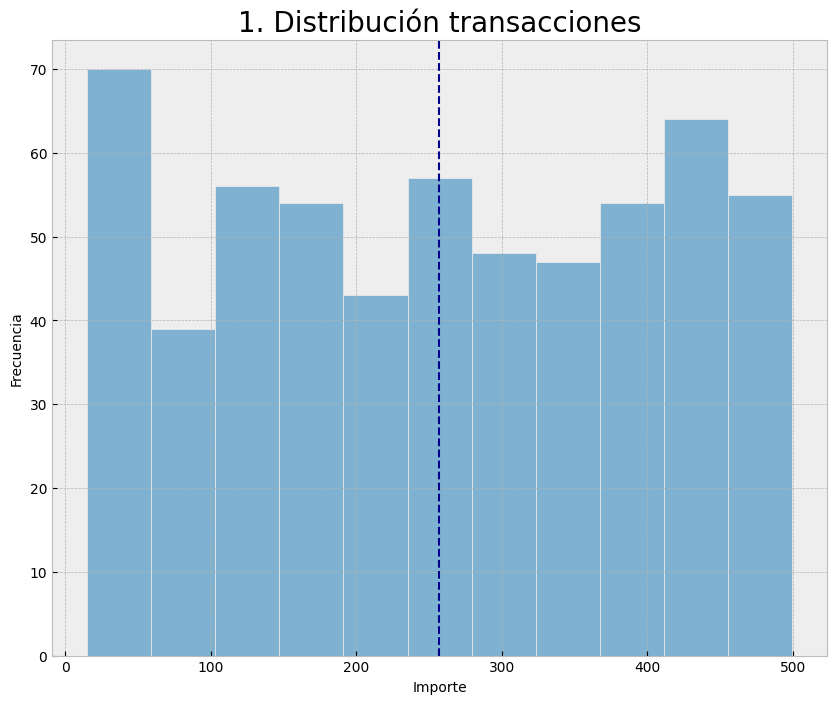

In [9]:
## EJERCICIO 1 NIVEL 1

## SCRIPT VISUALIZACIÓN

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(10,8))

media = round(np.mean(transactions_DF['Importe']),2)

sns.histplot(transactions_DF['Importe'],
             alpha=.6)
        
plt.title('1. Distribución transacciones', fontsize= 20)
plt.xlabel('Importe', size=10)
plt.ylabel('Frecuencia', size=10)
plt.axvline(media, color='darkblue', linestyle='dashed', linewidth=1.5, label='Media')

plt.show()

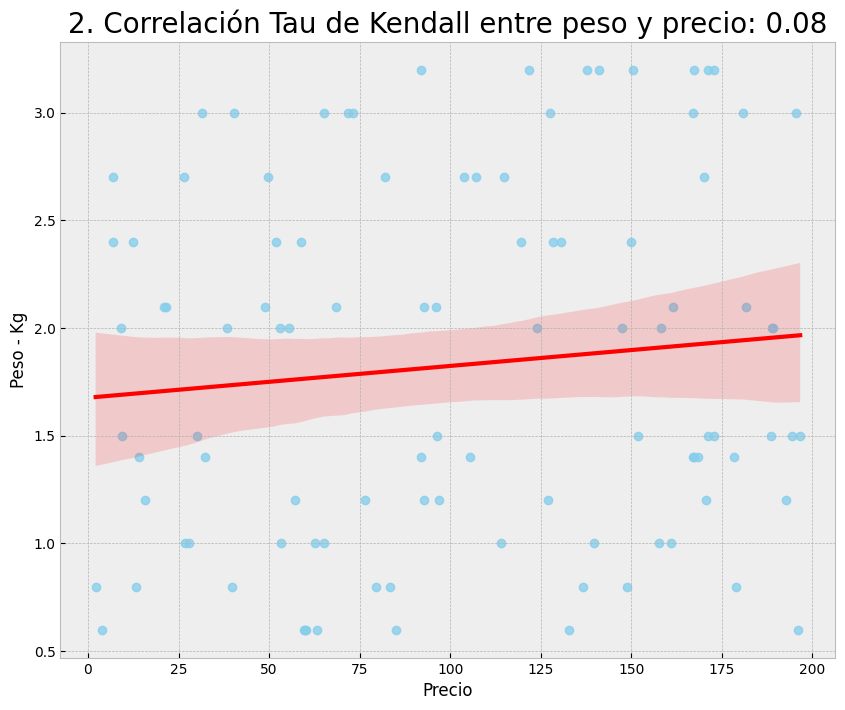

In [3]:
## EJERCICIO 2 NIVEL 1

## SCRIPT VISUALIZACIÓN

import seaborn as sns
import matplotlib.pyplot as plt

corr_peso_precio = round(products_DF['price'].corr(products_DF['weight'], method='kendall'), 2)

plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(10,8))

sns.regplot(x='price',
            y='weight',
            data=products_DF,
            scatter_kws={'color': 'skyblue'},
            line_kws={'color': 'red'})

plt.title(f'2. Correlación Tau de Kendall entre peso y precio: {corr_peso_precio}',fontsize= 20)
plt.xlabel('Precio')
plt.ylabel('Peso - Kg')
plt.show()

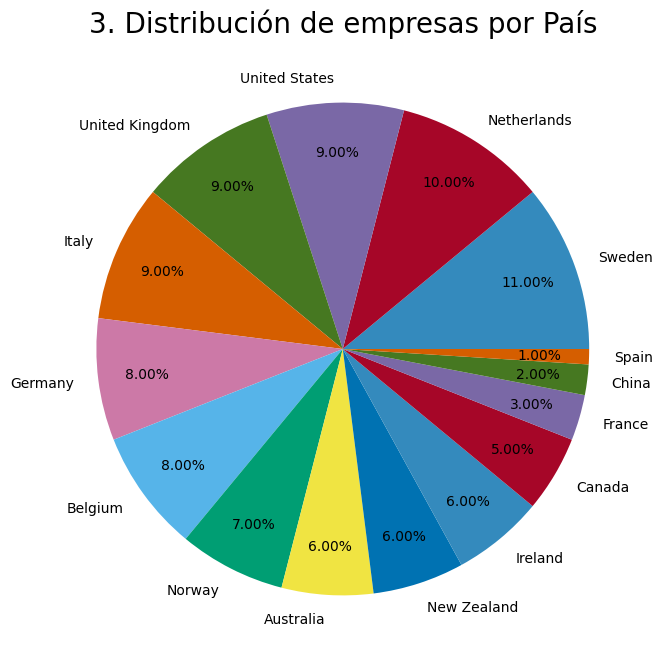

In [4]:
## EJERCICIO 3 NIVEL 1

## SCRIPT VISUALIZACIÓN

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

plt.pie(x=country_count['count'], 
        labels=country_count['País'], 
        autopct='%.2f%%', 
        pctdistance=0.8, 
        labeldistance=1.1)

plt.title('3. Distribución de empresas por País', fontsize=20)

plt.show()

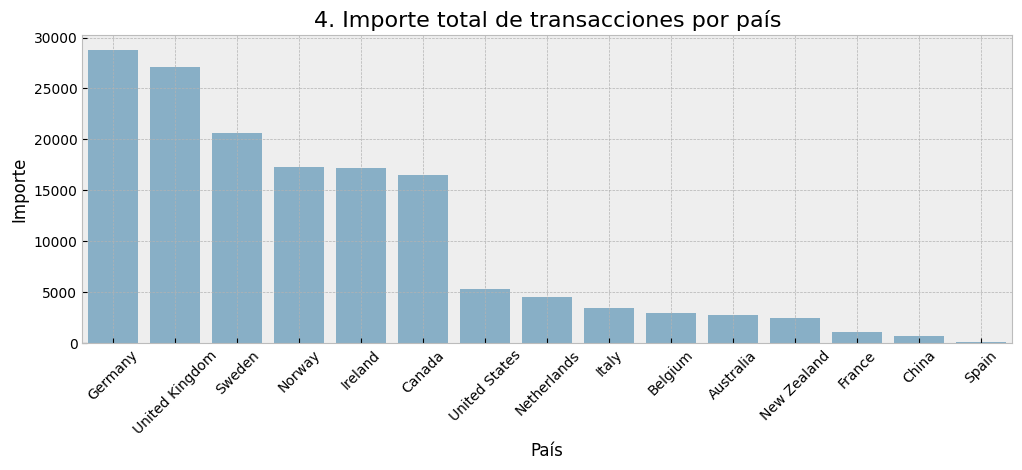

In [5]:
## EJERCICIO 4 NIVEL 1

## SCRIPT VISUALIZACIÓN

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('bmh')
plt.subplots(figsize=(12,4))

sns.barplot(data=total_pais, 
            x='País', 
            y='Importe',
            alpha=.6)
          
plt.title('4. Importe total de transacciones por país', fontsize = 16)
plt.xlabel('País')
plt.ylabel('Importe')  
plt.xticks(rotation=45, fontsize=10)
plt.grid(True)

plt.show()

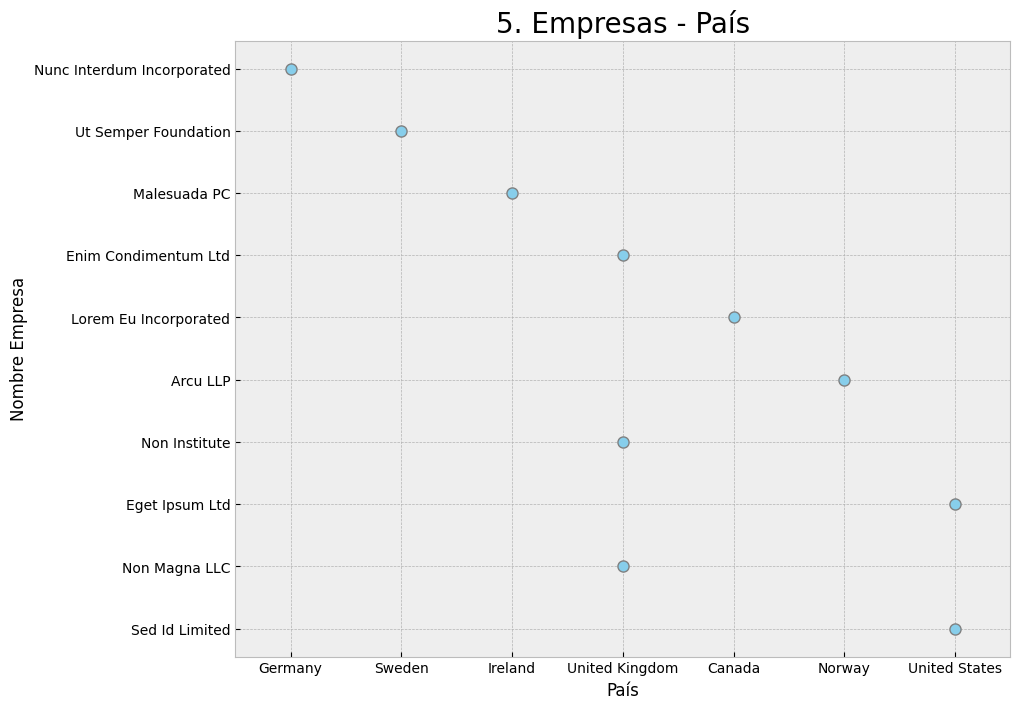

In [6]:
## EJERCICIO 5 NIVEL 1

## SCRIPT VISUALIZACIÓN

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(10,8))

g = sns.swarmplot(data=top10_empresas,
            y='company_name',
            x='País',
            s= 8,
            color= 'skyblue',
            linewidth=1, 
            edgecolor='grey')

g.set_title('5. Empresas - País', fontsize = 20)
g.set_xlabel('País')
g.set_ylabel('Nombre Empresa')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.grid(True)
  
plt.show()

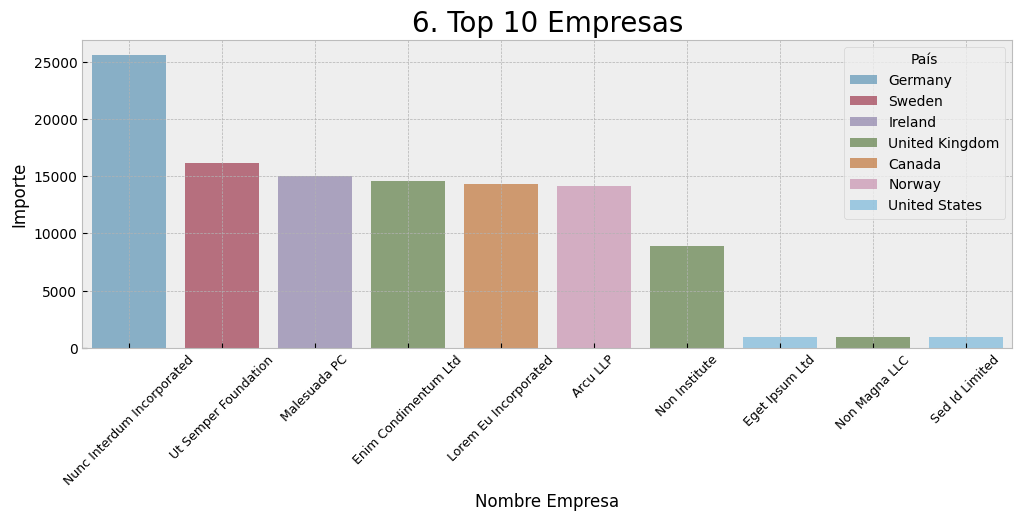

In [7]:
## EJERCICIO 6 NIVEL 1

## SCRIPT VISUALIZACIÓN

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('bmh')
plt.subplots(figsize=(12,4))

sns.barplot(data=top10_empresas, 
                x='company_name', 
                y='Importe', 
                hue='País',
                alpha=.6)   
    
plt.title('6. Top 10 Empresas', fontsize = 20)
plt.xlabel('Nombre Empresa')
plt.ylabel('Importe')  
plt.yticks(fontsize=10)
plt.xticks(fontsize=9, rotation=45)
plt.grid(True)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')
    
plt.show()

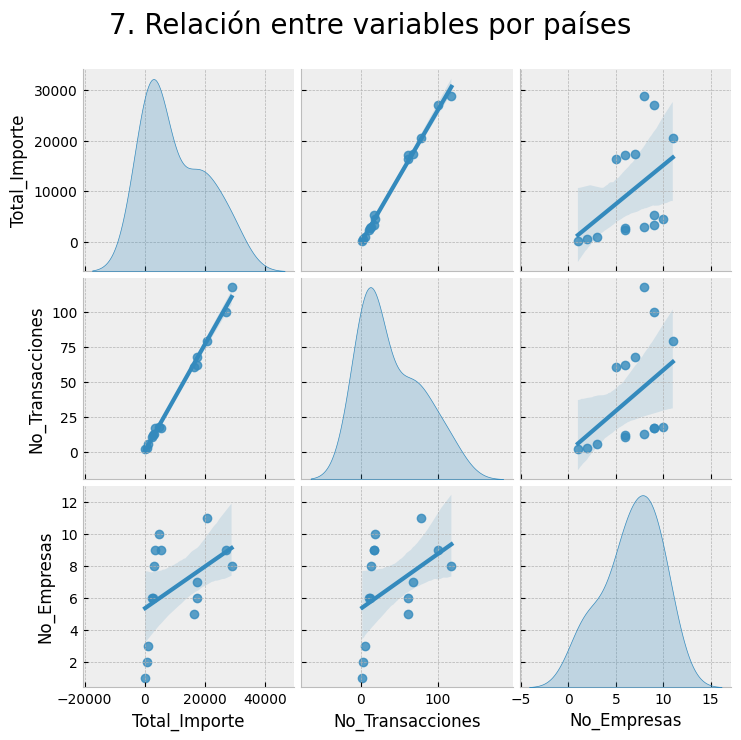

In [8]:
## EJERCICIO 7 NIVEL 1

## SCRIPT VISUALIZACIÓN

import seaborn as sns
import matplotlib.pyplot as plt

g = sns.pairplot(info_pais, diag_kind='kde', kind='reg')

g = plt.subplots_adjust(top=0.9)  
g = plt.suptitle('7. Relación entre variables por países', 
                      fontsize=20, ha='center')

plt.show()